In [ ]:
#import the requirement packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load cleaned data
benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
sierraleone = pd.read_csv('../data/sierraleone_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


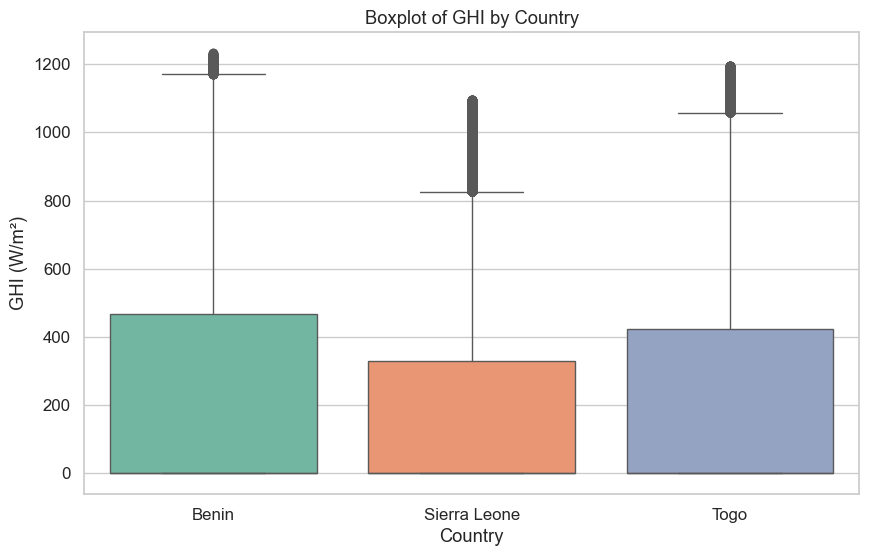

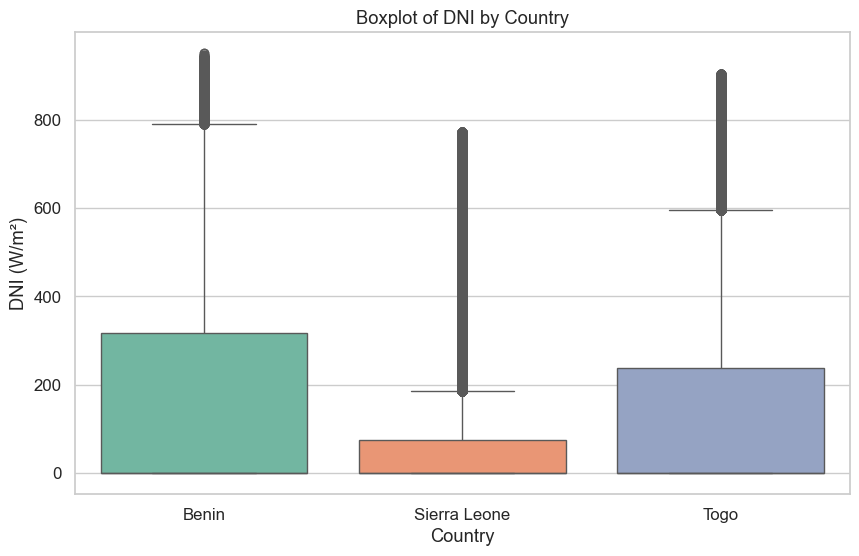

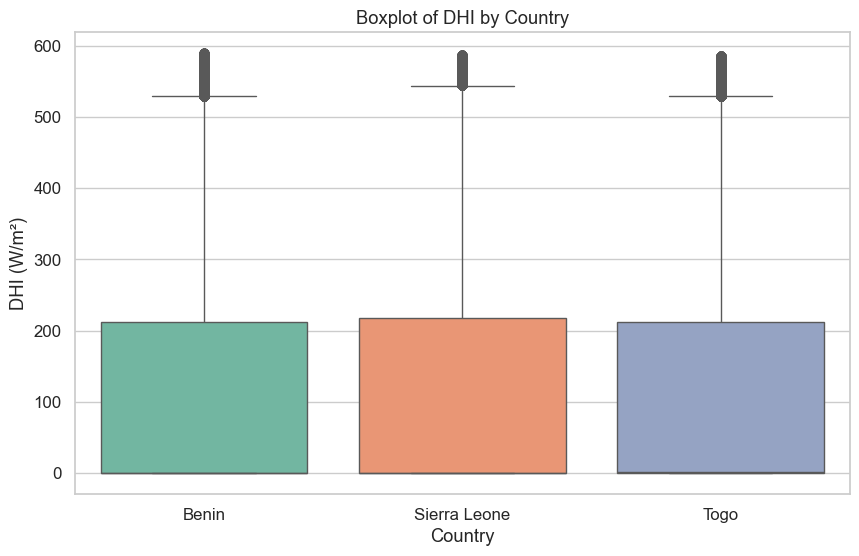

In [40]:
#matrix comparison for for Boxplot
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_all, x='Country', y=metric, hue='Country', palette='Set2', dodge=False, legend=False)
    plt.title(f'Boxplot of {metric} by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.show()

In [33]:
# matrix comparison for Summary Table
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]  # flatten multi-level columns
summary = summary.round(2)  # round to 2 decimal places
summary


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,237.48,0.6,327.17,167.14,0.0,261.94,113.17,0.4,151.66
Sierra Leone,187.21,0.0,277.02,104.21,0.0,200.82,110.50,0.0,151.44
Togo,225.03,0.5,316.45,147.97,0.0,247.68,112.78,1.5,151.57


In [ ]:
#stastical testing
benin_ghi = df_all[df_all['Country'] == 'Benin']['GHI'].dropna()
sierraleone_ghi = df_all[df_all['Country'] == 'Sierra Leone']['GHI'].dropna()
togo_ghi = df_all[df_all['Country'] == 'Togo']['GHI'].dropna()

anova_stat, anova_p = stats.f_oneway(benin_ghi, sierraleone_ghi, togo_ghi)
print("🔹 One-way ANOVA test:")
print(f"   F-statistic = {anova_stat:.3f},  p-value = {anova_p:.5f}")

kw_stat, kw_p = stats.kruskal(benin_ghi, sierraleone_ghi, togo_ghi)
print("\n🔹 Kruskal–Wallis test:")
print(f"   H-statistic = {kw_stat:.3f},  p-value = {kw_p:.5f}")


🔹 One-way ANOVA test:
   F-statistic = 3705.220,  p-value = 0.00000

🔹 Kruskal–Wallis test:
   H-statistic = 2743.460,  p-value = 0.00000


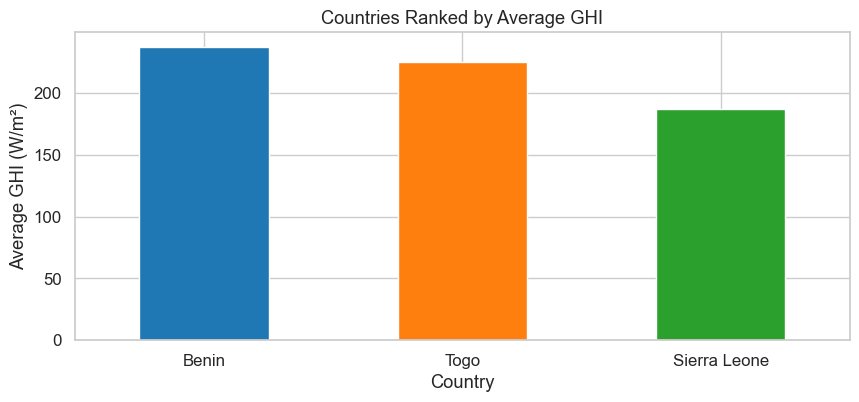

In [39]:
#visual Summary by bar chart
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 4))  # Small size as specified
avg_ghi.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Countries Ranked by Average GHI')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(rotation=0)
plt.show()

***Key Observations***

Benin exhibits the highest mean GHI (237.48 W/m²) and DNI (167.14 W/m²), highlighting its superior overall solar potential, but also the greatest variability (std of 327.17 for GHI and 261.94 for DNI), which may pose challenges for consistent energy generation.

Sierra Leone shows the lowest mean values across GHI (187.21 W/m²), DNI (104.21 W/m²), and DHI (110.50 W/m²), with zero medians for GHI and DNI, indicating generally lower irradiance but slightly more stability in diffuse radiation (lowest DHI std at 151.44).

Togo strikes a balance with moderate mean GHI (225.03 W/m²) and DNI (147.97 W/m²), plus the highest median DHI (1.5 W/m²), suggesting reliability for diffuse solar applications despite high GHI variability (std 316.45).